# Regression avec PyTorch

In [1]:
%matplotlib inline
import torch as t
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

#### pytorch est un outil similaire a numpy. Il permet de faire des calculs sur des tableaux 1D,2D,3D,4D (ou plus). En pytorch, on appelle ces tableaux des tenseurs.

#### La principale difference entre les tenseurs pyTorch et les tableaux  numpy est que les tenseurs pyTorch peuvent etre envoyes sur une carte graphique pour etre traites plus rapidement

## Partie 1 : les tenseurs en pyTorch

In [2]:
# on cree:
#     un vecteur de taille 2,
x1 = t.Tensor([10,20])

#     une matrix 2x1,
x2 = t.Tensor([[10],[20]])

#     une matrice 1x2,
x3 = t.Tensor([[10,20]])

#     une matrce 3x4 remplie de zeros
x4 = t.zeros(3,4)

#     une matrice aleatoire (loi normale) 2x2
x5 = t.randn(2,2)

Affichez dans la cellule ci-dessous les differents tableaux crees ci-dessus, pour bien comprendre ces commandes

#### comme avec numpy, on peut faire des tas d'operations sur ces tableaux

In [ ]:
# j'ajoute 3 a toutes les cases du tableau x1
x5 = x1 + 3
# j'eleve au carre toutes les cases du tableau x4
x6 = x5 ** 2

Affichez dans la cellule ci-dessous les differents tableaux crees ci-dessus, pour bien comprendre ces commandes

#### On peut convertir des donnees entre numpy et pytorch

In [ ]:
# conversion d'un tableau numpy vers pytorch
z1  = np.zeros( (2,2) )
x6 = t.from_numpy( z1 )

# conversion d'un tableau pytorch vers numpy
z2 = x6.numpy()

Affichez dans la cellule ci-dessous les differents tableaux crees ci-dessus, pour bien comprendre ces commandes

#### Operations utiles de pyTorch, similaires aux operations disponibles dans numpy

In [ ]:
# transposition
x7 = x2.t()

# changement de forme (comme reshape en numpy)
# ici, on convertit une matrice 1x2 en matice 2x1
x8 = x7.view(2,1)


# remplir de zero un tableau existant
x6.zero_()

# multiplication de matrice
x9 = t.mm( x8 , x7 )

Affichez dans la cellule ci-dessous les differents tableaux crees ci-dessus, pour bien comprendre ces commandes

In [ ]:
# acceder aux lignes, colonnes, et elements d'un tenseur, c'est comme avec numpy
print(x9[0,:],x9[:,0],x9[1,1])

#### exercice:
Creez un tenseur 10x10 rempli avec des uns,
mettez des deux sur la diagonale, et elevez-le au carre, et affichez le resultat comme un tableau numpy

In [5]:
x = t.zeros(10,10)+1
x2= x + t.diag(t.ones(10))
x3= x2**2
print(x3.numpy())

[[ 4.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  4.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  4.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  4.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  4.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  4.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  4.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  4.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  4.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  4.]]


## Partie 2 : les variables en pyTorch

(cette partie est tres succincte. pour d'autres infos, voir ici: http://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html )

En pytorch, une variable est une boite qui contient un tenseur.

In [ ]:
x1 = t.Tensor([[10,20]])
v1 = Variable( x1 )  # on aurait pu ecrire directement v1=Variable(t.Tensor([10,20]))

print(v1)

on peut recupere le tenseur a l'interieur de la boite de cette facon:

In [ ]:
d1 = v1.data
print(d1)

Les operations sur les variables pyTorch sont les *memes* que celles sur les tenseurs (addition, multiplication, transposition, conversion, etc..).

In [ ]:
v2 = (v1 ** 2).t()
print( v2 )

On peut faire ces memes operations sur les tenseurs associes aux variables, mais ces operations ne seront pas enregistrees dans le graphe de computation

In [ ]:
t10 = (v1.data ** 2).t()
print(t10)    # t10 est un tenseur, pas une variable, donc on ne peut pas calculer une derivee

L'interet des variables pyTorch est que toutes les operations faites sur ces variables sont enregistrées (sous la forme d'un graphe de computation, mais c'est transparent pour vous).

Donc pytorch peut calculer une derivee ou un gradient automatiquement si vous le souhaitez a partir de ce graphe.

Un exemple de ce type de graphe est visible ici: https://cdn-images-1.medium.com/max/1600/1*5PLIVNA5fIqEC8-kZ260KQ.gif

Pour indiquer qu'on voudra plus tard la derivee par rapport a une variable donnee, cette variable doit etre cree avec l'option *requires_grad=True*

Par exemple, calculons (v-20)^2, pour v=10.

In [ ]:
v1 = Variable( t.Tensor([10]) , requires_grad=True)

In [ ]:
v2 = (v1 - 20) ** 2
print('valeur de v2=',v2)

Maintenant, demandons a pyTorch de deriver v2, comme si v2 etait une fonction de v1.

In [ ]:
# ici, je demander de calculer la derivee de v2 par rapport a toutes les variables
v2.backward()

* La derivee de v2 par rapport a v1 est disponible dans v1.grad.
* la commande backward va calculer le gradient et l'ajouter a v1.grad.

In [ ]:
print(v1.grad)

Notez que v1.grad est elle-meme une variable. On peut donc acceder au tenseur associé

In [ ]:
print( v1.grad.data )

si je refais exactement les memes operations, le nouveau gradient, identique a l'ancien, est rajoute a v1.grad:

In [ ]:
v2 = (v1 - 20) ** 2
v2.backward()
print(v1.grad)

Si on calcule le gradient plusieurs fois, il faut donc remettre a zero le tenseur du gradient a chaque fois

In [ ]:
v1.grad.data.zero_()
v2 = (v1 - 20) ** 2
v2.backward()
print(v1.grad)

## Partie 3 - la descente de gradient

Attention, lorsque vous executez backward, le graphe de computation est efface (sauf les variables que vous avez crees). Donc pour relancer backward, il faut relancer les calculs aussi

In [ ]:
# descente de gradient
v1 = Variable( t.Tensor([10]) , requires_grad=True)
for i in range(500):
    v2 = (v1 - 20) ** 2
    v2.backward()
    v1.data -= 0.01*v1.grad.data   # on ne veut pas enregistrer ca dans le calcul du gradient
    v1.grad.data.zero_()

In [ ]:
print(v1)

On peut faire la meme chose en mettant le calcul de v2 dans une fonction et en mettant un pas de descente de gradient dans une fonction

In [ ]:
def mafonction(v):
    return (v - 20) ** 2

def descendGradient(v):
    v1.data -= 0.01*v1.grad.data   # on ne veut pas enregistrer ca dans le calcul du gradient
    v1.grad.data.zero_()

v1 = Variable( t.Tensor([10]) , requires_grad=True)

for i in range(500):
    v2 = mafonction(v1)
    
    v2.backward()
    
    descendGradient(v1)

print(v1)

#### Exercice 1

On veut coder une descente de gradient sur fonction:

f(theta) = sum (theta-xi)^2
avec x=(10,20,30,40,50,60,70,80,90)

autrement dit, on a f(theta)=(theta-10)^2 + (theta-20)^2 + (theta-30)^2 + ...

Ecrivez cela en pyTorch

##### Je propose deux corrections possibles a cet exercice
##### correction 1

In [9]:
x = Variable(t.Tensor([10,20,30,40,50,60,70,80,90]))
theta = Variable(t.Tensor([0]),requires_grad=True)

for epoch in range(100):
    f = t.sum((theta-x)**2)
    f.backward()
    theta.data -= 0.1 * theta.grad.data
    theta.grad.data.zero_()

print(theta)

Variable containing:
 50.0000
[torch.FloatTensor of size 1]



##### correction 2

In [10]:
x = Variable(t.Tensor([10,20,30,40,50,60,70,80,90]))
theta = Variable(t.Tensor([0]),requires_grad=True)

for epoch in range(100):
    
    f = Variable(t.Tensor([0]))
    
    for i in range(9):
        f = f + (theta-x[i])**2
    
    f.backward()
    theta.data -= 0.1 * theta.grad.data
    theta.grad.data.zero_()

print(theta)

Variable containing:
 50.0000
[torch.FloatTensor of size 1]



#### Exercice 2 (regression lineaire)

Soit les donnees suivantes, generees aleatoirement:

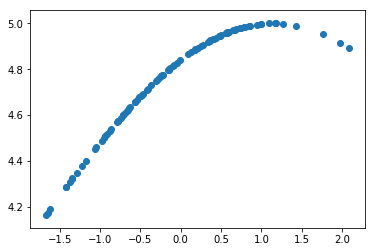

In [12]:
x = t.randn(100)
y = t.sin(x/2+1)+4
plt.scatter(x.numpy(),y.numpy())

On veut faire une regression lineaire simple sur ces donnees. Pour rappel, en regression lineaire simple, on defini deux parametres beta0 et beta1, et pour un valeur xi donnee, la prediction est obtenue en faisant zi = beta0+beta1.xi
De meme l'erreur totale de prediction est la somme (yi-zi)^2 pour tous les i.

Vous ferez ceci:
* On va definir deux parametres pour la regression linéaire: beta0 et beta1
* definissez Z, la prediction donnee par la regression lineaire pour chaque point.
* definissez E, l'erreur de prediction
* appliquez l'algorithme de descente de gradient pour minimiser E, et affichez le resultat

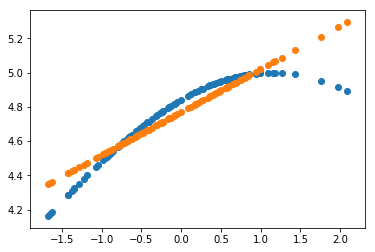

In [37]:
## Correction

xx = Variable(x)
yy = Variable(y)

beta0 = Variable(t.Tensor([0]),requires_grad=True)
beta1 = Variable(t.Tensor([0]),requires_grad=True)

for epoch in range(100):
    z = beta0+beta1*xx
    e = t.sum((yy-z)**2)
    
    e.backward()

    beta0.data -= 0.001 * beta0.grad.data
    beta1.data -= 0.001 * beta1.grad.data

    beta0.grad.data.zero_()
    beta1.grad.data.zero_()

plt.scatter(x.numpy(),y.numpy())
plt.scatter(x.numpy(),z.data.numpy())

#### Exercice 3 (regression logistique)

Implementez la regression logistique sur l'exemple vu en TD (le tableau de 6 donnees + la donnee supplementaire). Lancez la descente de gradient dessus

In [88]:
# correction

X = Variable(t.Tensor([5,5,12,12,12,12,0]))
y = Variable(t.Tensor([1,0,1,1,1,0,0]))

beta0 = Variable(t.Tensor([0]),requires_grad=True)
beta1 = Variable(t.Tensor([0]),requires_grad=True)


for epoch in range(100):
    z = beta0+beta1*X
    g = 1/(1+t.exp(-z))

    e = -y*t.log(g)  - (1-y)*t.log(1-g)

    e = t.mean(e)
    
    e.backward()

    beta0.data -= 0.1 * beta0.grad.data
    beta1.data -= 0.1 * beta1.grad.data

    beta0.grad.data.zero_()
    beta1.grad.data.zero_()

print("predictions de probabilites = ",1/(1+t.exp(-(beta0+beta1*X))))

predictions de probabilites =  Variable containing:
 0.5149
 0.5149
 0.7462
 0.7462
 0.7462
 0.7462
 0.3389
[torch.FloatTensor of size 7]



#### Exercice 4 (regression lineaire multiple)

Implementez la regression lineaire avec pyTorch sur les donnees de diabetes chargees ci-dessous. Ce dataset comporte 10 attributs decrivant le patient (age, sex, weight, blood pressure) et 442 patients.

In [90]:
# Correction

from sklearn import datasets

X,y = datasets.load_diabetes(True)
X   = np.hstack((np.ones((442,1)),X))

n,d = X.shape

X = Variable(t.Tensor(X))
y = Variable(t.Tensor(y))

In [96]:
beta  = Variable(t.randn(d,1),requires_grad=True)

for epoch in range(30):
    z = t.mm(X,beta)
    e = t.mean( (y-z)**2 )
    
    e.backward()

    beta.data -= 0.1 * beta.grad.data
    beta.grad.data.zero_()